cel-rs.csv
next


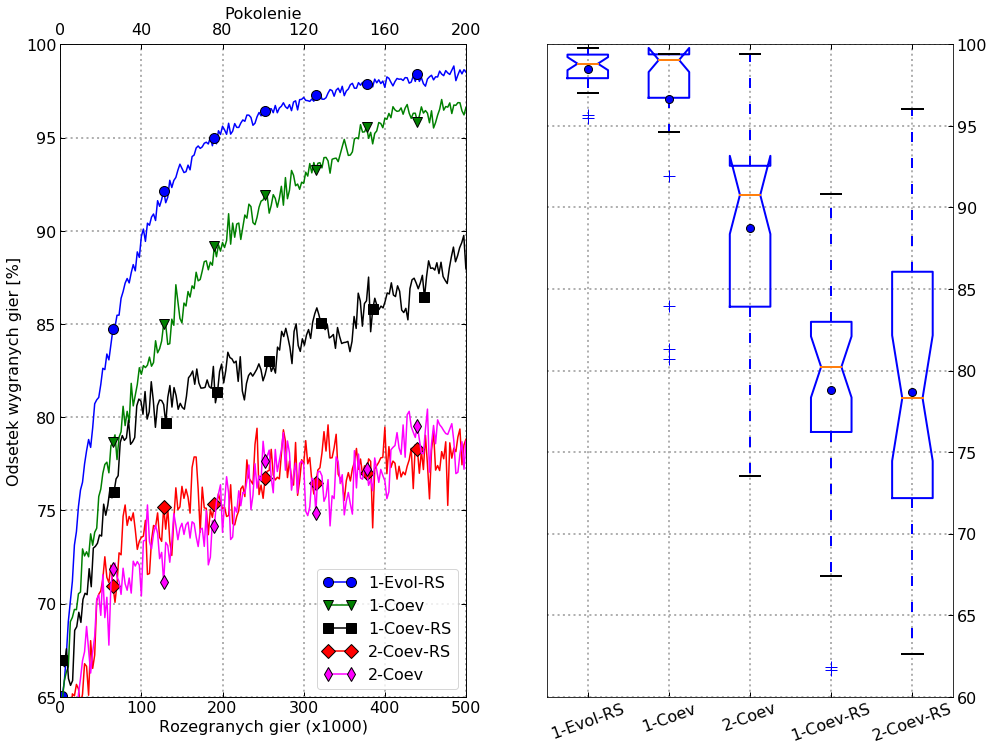

In [21]:
import matplotlib.pyplot as plt
import statistics as st
import csv
%matplotlib inline

#klasa do wczytywania danych
class Result:
    def __init__(self, name=None):
        self.name = name
        self.efforts = []
        self.data = []

def main():
    
    final_scores = []
    algorithms = [ Result('rsel.csv'), Result('cel-rs.csv'), Result('2cel-rs.csv'),
                  Result('cel.csv'), Result('2cel.csv') ]

    #Wczytywanie pliku csv
    for al in algorithms:
        with open(al.name, newline = '') as csvfile:
            csv_reader = list(csv.reader(csvfile))
            for line in csv_reader[1:]:
                al.efforts.append(float(line[1]))
                al.data.append(st.mean(list(map(float, line[2:])))) # srednia z listy
                if len(al.efforts) == 200:
                    final_scores.append(list(map(float, line[2:]))) #do boxplota ostatnia linia
  
    #Rysowanie wykresów
    fig = plt.figure(figsize=(16,12))
    
    #Wykres lewy
    ax = fig.add_subplot(1, 2, 1)
    labels = ['1-Evol-RS', '1-Coev', '1-Coev-RS', '2-Coev-RS', '2-Coev']           
    colors = ['blue', 'g', 'black', 'red', 'fuchsia']
    markers = ['o', 'v', 's', 'D', 'd']

    #Przekazanie danych
    for i in range(0, 5):
        ax.plot(algorithms[i].efforts, algorithms[i].data, label=labels[i], marker=markers[i], 
                color=colors[i], markersize = 10, markevery=25, markeredgecolor='black')
        
    axtop = ax.twiny()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:int(x/1000)))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:int(y*100)))
    axtop.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:int(x*200)))
    ax.set_ylim(0.65,1)
    ax.set_xlim(0, 500000)
    ax.set_ylabel('Odsetek wygranych gier [%]',fontsize=16)
    ax.set_xlabel('Rozegranych gier (x1000)',fontsize=16)
    axtop.set_xlabel('Pokolenie',fontsize=16)
    axtop.tick_params(labeltop=True, labelbottom=False, bottom=False, top=False)
    ax.grid(b=True, which='major', axis='both', linestyle=':', linewidth=2)
    ax.tick_params(direction='in', length=5, width=1, top=True, right=True)
    axtop.tick_params(labeltop=True, labelbottom=False, bottom=False, top=False,labelsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(loc='lower right', fontsize=16, numpoints=2)

    #Wykres prawy
    bx = fig.add_subplot(1, 2, 2)
    bx.boxplot(final_scores,
            notch=True, #wciecie 
            labels={'1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev'},
            showmeans=True, #srednie arytmetyczne (kropki)
            meanprops={'marker':'o', 'markerfacecolor':'blue', 'markeredgecolor':'black', 'markersize':'8'},
            medianprops={'linewidth': 2},
            boxprops={'color':'blue', 'linewidth': 2}, #boxes
            flierprops={'marker':'+', 'markeredgecolor':'blue', 'markersize': 12}, #fliers                    
            capprops={'linewidth': 2},
            whiskerprops={'linewidth': 2, 'color': 'blue', 'linestyle': (0,(5,8))}) #linie do fliers
    bx.tick_params(direction='in', length=5, width=1, top=True, right=True, labelright=True, left=False, labelleft=False)
    bx.set_ylim(0.6, 1.0)
    plt.xticks(rotation=20) #obrót etykiet
    bx.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:int(x*100)))
    plt.grid(True, linestyle=':', linewidth=2)
    bx.tick_params(axis='both', which='major', labelsize=16)
    
    fig.savefig('132244-plot.pdf')
    
if __name__ =='__main__':
    main()